<a href="https://colab.research.google.com/github/nigam-aditya/thermal_screening_project/blob/main/thermal_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
!wget https://raw.githubusercontent.com/nigam-aditya/thermal_screening_project/main/image%20source/rawimage.png

--2021-05-18 06:37:53--  https://raw.githubusercontent.com/nigam-aditya/thermal_screening_project/main/image%20source/rawimage.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180234 (176K) [image/png]
Saving to: ‘rawimage.png’

rawimage.png        100%[===================>] 176.01K  --.-KB/s    in 0.02s   

2021-05-18 06:37:53 (7.11 MB/s) - ‘rawimage.png’ saved [180234/180234]



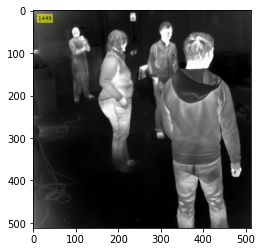

In [4]:
image = read_image("/content/rawimage.png")   
plt.imshow(image)

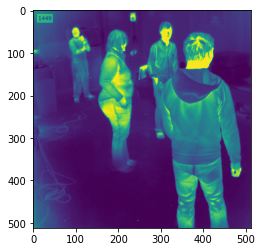

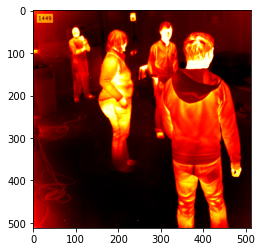

In [5]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
plt.imshow(heatmap_gray)
plt.show()
plt.imshow(heatmap)
plt.show()

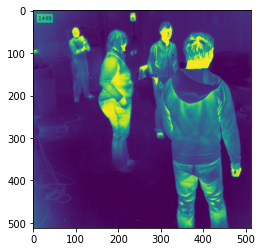

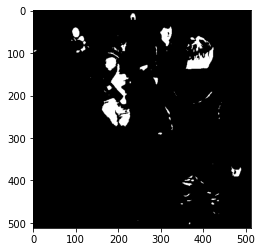

In [6]:
heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
plt.imshow(heatmap_gray)
plt.show()
# thresh holding
ret, binary_thresh = cv2.threshold(heatmap_gray, 210, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')

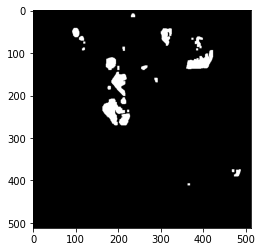

In [7]:
# erosion and dilation
kernel = np.ones((5, 5), np.uint8)
image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
image_opening = cv2.dilate(image_erosion, kernel, iterations=1)

plt.imshow(image_opening, cmap='gray')

(249.69154929577465, 0.0, 0.0, 0.0)


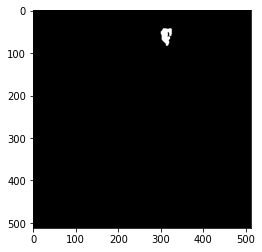

In [8]:
# find all contours of the image 
contours, _ = cv2.findContours(image_opening, 1, 2)

# example of a contour in a mask
contour = contours[24]
mask = np.zeros_like(heatmap_gray)
x, y, w, h = cv2.boundingRect(contour)
mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]
print(cv2.mean(heatmap_gray, mask=mask))
plt.imshow(mask, cmap='gray')

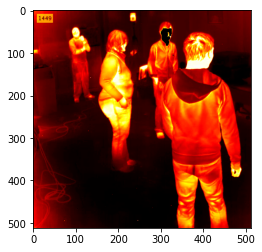

In [9]:
# above mask in a heat map
masked = cv2.bitwise_and(heatmap, heatmap, mask=~mask)
plt.imshow(masked)

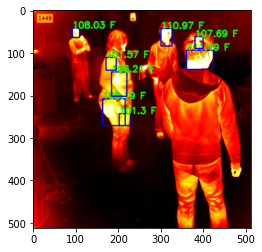

In [10]:
result = np.copy(heatmap)

for contour in contours:
    # rectangle over each contour
    x, y, w, h = cv2.boundingRect(contour)

    # neglect small contours to have better results
    if w*h<370:
      continue

    mask = np.zeros_like(heatmap_gray)
    mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]

    # Temperature calculation
    temp = round(cv2.mean(heatmap_gray, mask=mask)[0] / 2.25, 2)

    # Draw rectangles for visualisation
    result = cv2.rectangle(
        result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    # Write temperature for each rectangle
    cv2.putText(result, f"{temp} F", (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(result)

In [12]:
cv2.imwrite('result.png',cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

True